In [2]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import quandl as q
q.ApiConfig.api_key = "R8WuAzDWGs-WFHsyJo25"
from dateutil.relativedelta import relativedelta

In [3]:
# sp500 = q.get('YAHOO/INDEX_GSPC')
# mask_1 = (sp500.index >= '1978-01-03')
# sp500 = sp500[mask_1]

# vix = q.get('YAHOO/INDEX_VIX', collapse='monthly')
# dji = q.get('YAHOO/INDEX_DJI')

# pmi_new_oder = q.get('ISM/MAN_NEWORDERS')
# pmi = q.get('ISM/MAN_PMI')

In [13]:
sp500 = pd.read_csv('data_raw/sp500.csv', parse_dates=True, index_col=0)
vix = pd.read_csv('data_raw/vix.csv', parse_dates=True, index_col=0)
dji = pd.read_csv('data_raw/dji.csv', parse_dates=True, index_col=0)
pmi_new_oder = pd.read_csv('data_raw/pmi_new_oder.csv', parse_dates=True, index_col=0)
pmi = pd.read_csv('data_raw/pmi.csv', parse_dates=True, index_col=0)

In [4]:
hike_cycle = pd.read_csv('data_cleaned/rate_hike_cycles.csv', index_col=0)
recession_cycle = pd.read_csv('data_cleaned/recession_cycles.csv', index_col=0)
cycle_up = pd.read_csv('data_cleaned/pcu_cycle_up.csv', index_col=0)
cycle_down = pd.read_csv('data_cleaned/pcu_cycle_down.csv', index_col=0)

In [10]:
tcu = pd.read_csv('data_raw/tcu_rate.csv', index_col=0, parse_dates=True)
gdp_us_rate = pd.read_csv('data_raw/gdp_real_rate.csv', index_col=0, parse_dates=True)
gdp_us = pd.read_csv('data_cleaned/real_gdp_index.csv', index_col=0, parse_dates=True)
fed_rate = pd.read_csv('data_cleaned/effr_cleaned.csv', index_col=0, parse_dates=True)
cpi_us = pd.read_csv('data_raw/cpi_rate.csv', index_col=0, parse_dates=True)
dx = pd.read_csv('data_raw/dx_f_m.csv', index_col=0, parse_dates=True)
gold = pd.read_csv('data_raw/gc_f_m.csv', index_col=0, parse_dates=True)
un_rate = pd.read_csv('data_raw/un_rate_us.csv', index_col=0, parse_dates=True)
TY10Y2_us = pd.read_csv('data_raw/T10Y2Y.csv', index_col=0, parse_dates=True)

wholesale = pd.read_csv('data_raw/wholesale_sale_rate.csv', index_col=0, parse_dates=True)
business_inventory = pd.read_csv('data_raw/business_inventory_rate.csv', index_col=0, parse_dates=True)
output_gap = pd.read_csv('data_raw/output_gap.csv', index_col=0, parse_dates=True)


In [88]:
three_mon_rel = relativedelta(months=12)
TY10Y2_us.index = [i + three_mon_rel for i in TY10Y2_us.index]


(722110.0, 736420.0)

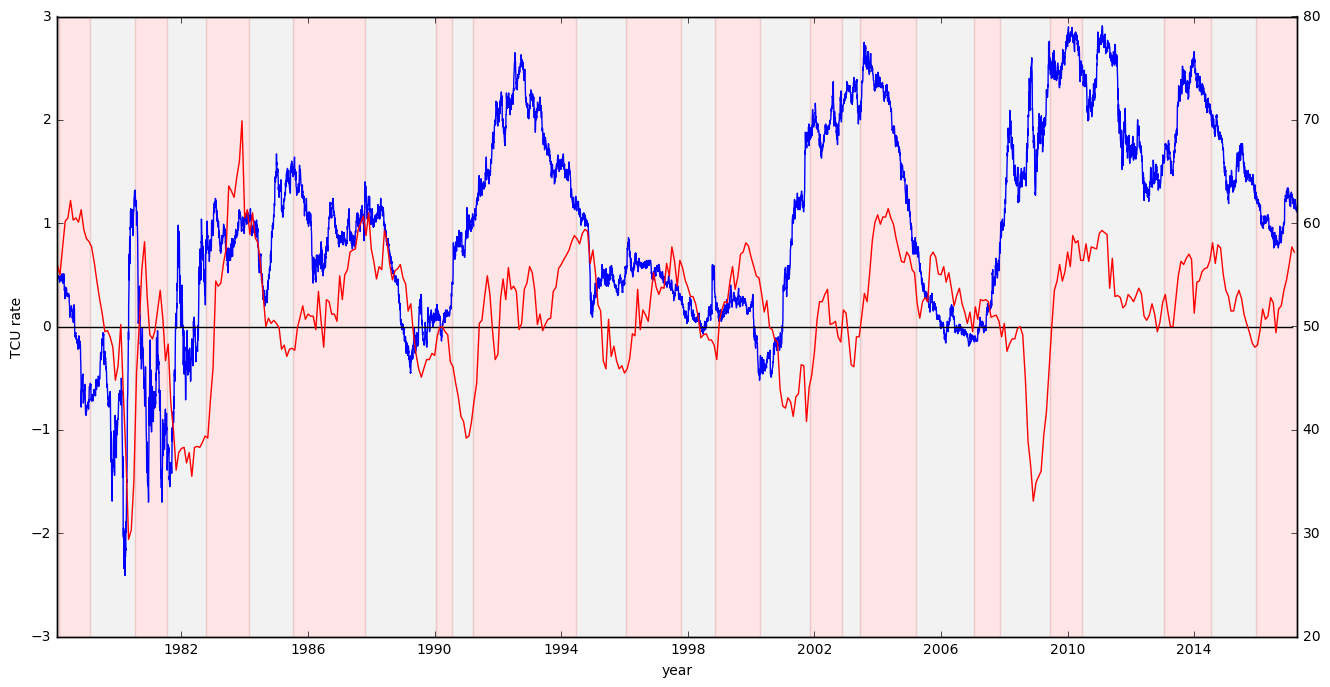

In [16]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax1.plot(TY10Y2_us.index, TY10Y2_us.iloc[:, 0])
#ax1.plot(tcu.index, tcu.iloc[:, 0])
#ax1.plot(sp500.index, sp500.iloc[:, 0])
#ax1.plot(dji.index, dji.iloc[:, 0])
#ax1.plot(un_rate.index, un_rate.iloc[:, 0])
ax1.set_xlim([datetime.date(1978, 1, 26), datetime.date(2017, 4, 1)])


#ax1.plot(gdp_rate.index, gdp_rate.iloc[:, 0])
plt.xlabel('year')
plt.ylabel('TCU rate')

plt.plot((tcu.index[0], tcu.index[-1]), (0, 0), 'k-')

#plt.ylabel('Fed Rate')
for i in xrange(15):
    ax1.axvspan(cycle_up.iloc[i, 0], cycle_up.iloc[i, 1], alpha=0.1, color='red')
    if i < 14:
        ax1.axvspan(cycle_down.iloc[i, 0], cycle_down.iloc[i, 1], alpha=0.1, color='grey')
ax2 = ax1.twinx()
#ax2.plot(output_gap.index, output_gap.iloc[:, 0], 'r')
#ax2.plot(un_rate.index, un_rate.iloc[:, 0], 'r')
ax2.plot(pmi.index, pmi.iloc[:, 0], 'r')

ax2.set_xlim([datetime.date(1978, 1, 26), datetime.date(2017, 4, 1)])

#ax3 = ax1.twinx()
#ax3.plot(tcu.index, tcu.iloc[:, 0], 'g')